In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

from sklearn.tree import plot_tree, export_graphviz,export_text

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---
#의사결정 모델과 과대적합(overfitting)
- 규칙을 바탕으로 균일한 데이터 분류 -> 규칙복잡 -> 과대적합 가능성 높음

In [2]:
from sklearn.datasets import make_classification


---
샘플용 데이터 생성


In [8]:
X, y = make_classification(n_samples=120,n_features=2,n_classes=3,n_informative=2, n_redundant=0, n_repeated=0,n_clusters_per_class=1)

In [9]:
X.shape, y.shape

((120, 2), (120,))

In [24]:
X[:5],y[:5],X[:,1], np.round(X[:,0],2)

(array([[-0.71317921,  0.57193488],
        [-0.25430774,  0.74714037],
        [-1.89453897,  2.16947822],
        [-0.7873173 ,  0.76232427],
        [-1.30638495,  1.30567382]]),
 array([2, 1, 2, 2, 2]),
 array([ 0.57193488,  0.74714037,  2.16947822,  0.76232427,  1.30567382,
        -0.29432135, -0.94716466,  0.66763413, -1.15496491,  1.14839968,
        -0.24254015, -0.47328514,  0.67176625, -0.87363453,  1.87270884,
        -1.12152368,  0.31463932,  0.48666467,  0.900474  ,  1.09584749,
        -2.01802409,  0.90473564, -0.80260603,  1.44256658,  0.97011838,
        -0.96790498,  1.85838414, -1.02043424,  1.14993422,  1.28632237,
        -1.19981136, -2.88587899,  1.0421782 ,  0.20581408, -0.94714377,
         0.63153123,  0.71928096,  0.77704294,  0.86047223,  0.65057319,
         1.64865317,  2.12479954,  1.43008334,  1.30675292, -0.72340717,
        -1.90560291,  3.37329222,  1.48521607,  1.13233358, -0.93236349,
        -0.70999815,  1.18615896, -1.09114067, -2.01332304,  0.

In [25]:
x1 = np.round(X[:,0],2)
x2 = np.round(X[:,1],2)

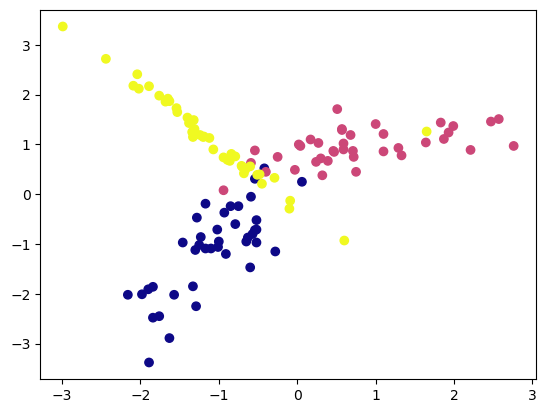

In [30]:
plt.scatter(x1, x2, c=y, cmap='plasma') #c는 y에 따라 색이 변함 #cmap #n_classes=3를 3으로 주었기 때문에 
# 로지스틱도 된다고?

In [44]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

---
### 분류 -> DT

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=11)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 2), (30, 2), (90,), (30,))

In [39]:
model = DecisionTreeClassifier(max_depth=3)

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
model.score(X_train,y_train)

0.9666666666666667

In [43]:
model.score(X_test,y_test)

0.8666666666666667

C:\Users\seo\AppData\Local\Temp\ipykernel_10512\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


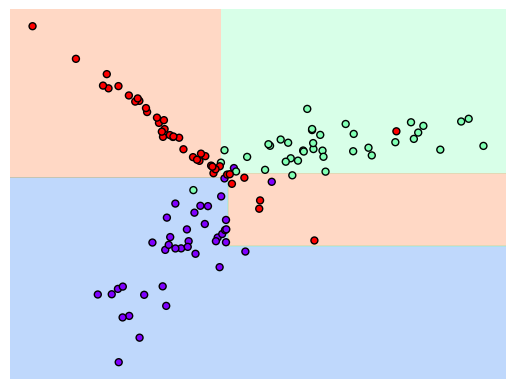

In [45]:
visualize_boundary(model,X,y)

C:\Users\seo\AppData\Local\Temp\ipykernel_10512\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


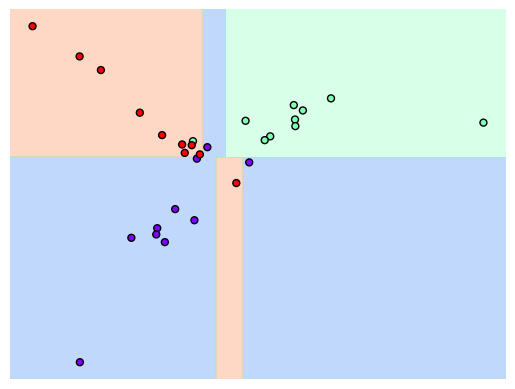

In [46]:
visualize_boundary(model,X_test,y_test)